<a href="https://colab.research.google.com/github/YoussefEldeebi/our-project/blob/main/shoplifting_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

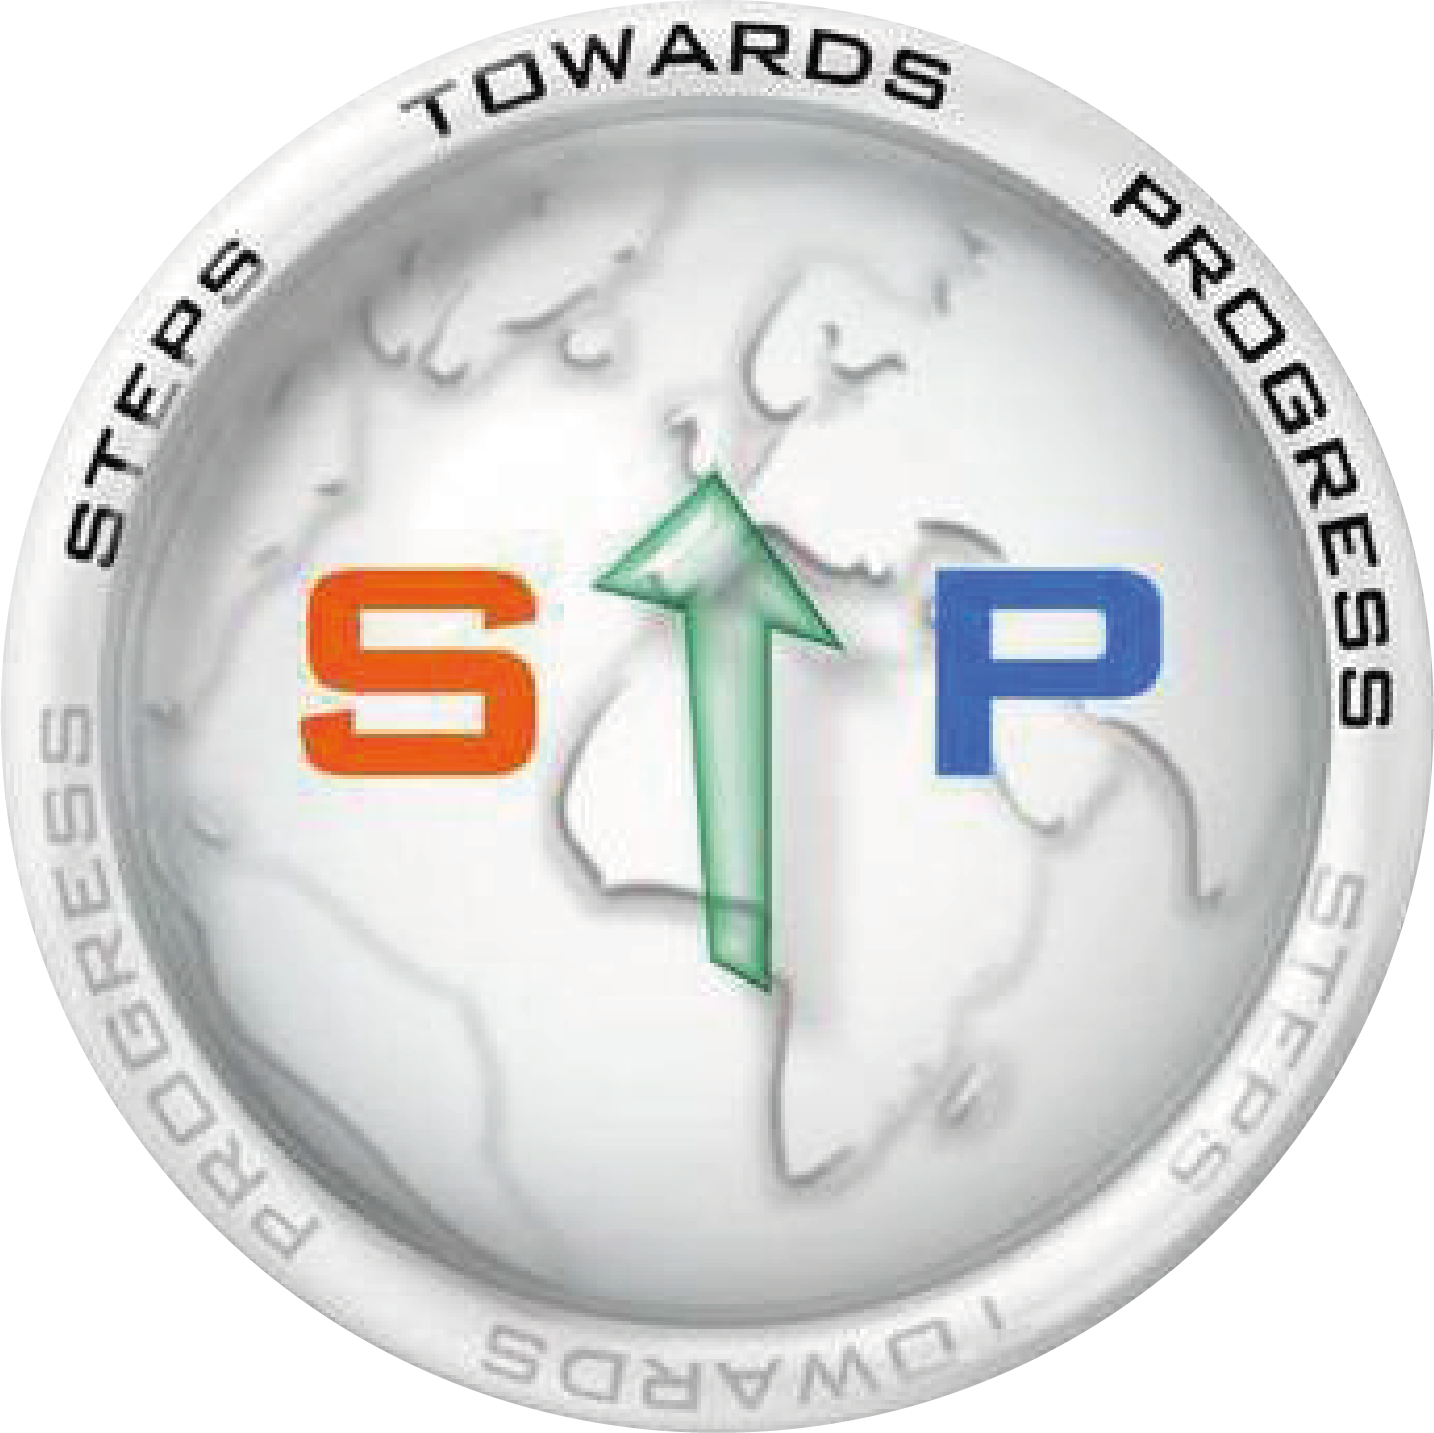

Import used library

In [1]:
# Import the required libraries.
import os
import cv2

import shutil


import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy import *

%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [2]:
seed_constant = 2
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

Read Drive to access data

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


Get the names of all classes/categories in shoplifting dataset.


In [4]:
all_classes_names = os.listdir('/content/drive/MyDrive/Phase 1 Dataset')
all_classes_names

['not Shop Lifters', 'shop lifter']

Print the count of each class

In [5]:
print('normal', len(os.listdir('/content/drive/MyDrive/Phase 1 Dataset/not Shop Lifters')))
print('shoplifting', len(os.listdir('/content/drive/MyDrive/Phase 1 Dataset/shop lifter')))

normal 565
shoplifting 0


In [6]:
import os
import shutil

# Define paths
source_folder = '/content/drive/MyDrive/Phase 1 Dataset/not Shop Lifters'
destination_folder = '/tmp/not_Shop_Lifters_Copyyy'
move_to_folder = '/tmp/first_128_files'

# Create a copy of the "not Shop Lifters" folder in the "/tmp" directory
shutil.copytree(source_folder, destination_folder)
os.makedirs(move_to_folder, exist_ok=True)
# Move the first 128 files from the copied folder to another folder
files_to_move = os.listdir(destination_folder)[:128]
for file_name in files_to_move:
    file_path = os.path.join(destination_folder, file_name)
    destination_path = os.path.join(move_to_folder, file_name)
    shutil.move(file_path, destination_path)

# After moving the files, you can print the number of files in each folder to verify
print("Number of files in the copied folder:", len(os.listdir(destination_folder)))
print("Number of files in the moved folder:", len(os.listdir(move_to_folder)))


Number of files in the copied folder: 437
Number of files in the moved folder: 128


Augment the shop Lifting data to avoid Overfitting

In [7]:

# Define input directory
input_dir = '/tmp/first_128_files'

# Define output directory
output_dir = '/tmp/augmented_shopliftingg'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to check if a file is an MP4 video
def is_mp4(filename):
    return filename.endswith('.mp4')

# List MP4 videos in the input directory
videos = [filename for filename in os.listdir(input_dir) if is_mp4(filename)]

# Augment videos
for video in videos:
    input_path = os.path.join(input_dir, video)
    output_path = os.path.join(output_dir, video)

    # Open video file
    cap = cv2.VideoCapture(input_path)

    # Check if video is accessible and valid
    if cap.isOpened():
        # Read first frame
        ret, frame = cap.read()

        # Check if frame is valid
        if ret:
            # Create output video writer
            fps = cap.get(cv2.CAP_PROP_FPS)
            frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

            # Process and write frames
            while ret:
                # Augment frame here (e.g., flip horizontally)
                augmented_frame = cv2.flip(frame, 1)

                # Write augmented frame to output video
                out.write(augmented_frame)

                # Read next frame
                ret, frame = cap.read()

            # Release video capture and writer
            cap.release()
            out.release()

            print(f"Video '{video}' augmented successfully.")
        else:
            print(f"Error: Unable to read frame from video '{video}'.")
    else:
        print(f"Error: Unable to open video '{video}'.")

print("Video augmentation completed.")


Video 'shop_lifter_3.mp4' augmented successfully.
Video 'shop_lifter_57.mp4' augmented successfully.
Video 'shop_lifter_n_71.mp4' augmented successfully.
Video 'shop_lifter_n_94_1.mp4' augmented successfully.
Video 'shop_lifter_n_42.mp4' augmented successfully.
Video 'shop_lifter_n_129_1.mp4' augmented successfully.
Video 'shop_lifter_n_154.mp4' augmented successfully.
Video 'shop_lifter_n_40_1.mp4' augmented successfully.
Video 'shop_lifter_114.mp4' augmented successfully.
Video 'shop_lifter_41.mp4' augmented successfully.
Video 'shop_lifter_n_158_1.mp4' augmented successfully.
Video 'shop_lifter_29.mp4' augmented successfully.
Video 'shop_lifter_51.mp4' augmented successfully.
Video 'shop_lifter_n_48.mp4' augmented successfully.
Video 'shop_lifter_23.mp4' augmented successfully.
Video 'shop_lifter_n_121.mp4' augmented successfully.
Video 'shop_lifter_n_103.mp4' augmented successfully.
Video 'shop_lifter_66.mp4' augmented successfully.
Video 'shop_lifter_n_105_1.mp4' augmented success

Append the original video to the file containing augmented data


In [8]:

# Define input directory
input_dir = '/tmp/first_128_files'

# Define output directory
output_dir = '/tmp/augmented_shopliftingg'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to check if a file is an MP4 video
def is_mp4(filename):
    return filename.endswith('.mp4')

# List MP4 videos in the input directory
videos = [filename for filename in os.listdir(input_dir) if is_mp4(filename)]

# Augment videos
for video in videos:
    input_path = os.path.join(input_dir, video)

    # Copy original video file to output directory with a new name
    new_video_name = f"original_{video}"
    output_original_path = os.path.join(output_dir, new_video_name)
    shutil.copy(input_path, output_original_path)
    print(f"Original video '{video}' copied to '{output_original_path}'.")

    # Open video file
    cap = cv2.VideoCapture(input_path)

    # Check if video is accessible and valid
    if cap.isOpened():
        # Read first frame
        ret, frame = cap.read()

        # Check if frame is valid
        if ret:
            # Create output video writer
            fps = cap.get(cv2.CAP_PROP_FPS)
            frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            output_path = os.path.join(output_dir, video)
            out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

            # Process and write frames
            while ret:
                # Augment frame here (e.g., flip horizontally)
                augmented_frame = cv2.flip(frame, 1)

                # Write augmented frame to output video
                out.write(augmented_frame)

                # Read next frame
                ret, frame = cap.read()

            # Release video capture and writer
            cap.release()
            out.release()

            print(f"Video '{video}' augmented successfully.")
        else:
            print(f"Error: Unable to read frame from video '{video}'.")
    else:
        print(f"Error: Unable to open video '{video}'.")

print("Video augmentation completed.")


Original video 'shop_lifter_3.mp4' copied to '/tmp/augmented_shopliftingg/original_shop_lifter_3.mp4'.
Video 'shop_lifter_3.mp4' augmented successfully.
Original video 'shop_lifter_57.mp4' copied to '/tmp/augmented_shopliftingg/original_shop_lifter_57.mp4'.
Video 'shop_lifter_57.mp4' augmented successfully.
Original video 'shop_lifter_n_71.mp4' copied to '/tmp/augmented_shopliftingg/original_shop_lifter_n_71.mp4'.
Video 'shop_lifter_n_71.mp4' augmented successfully.
Original video 'shop_lifter_n_94_1.mp4' copied to '/tmp/augmented_shopliftingg/original_shop_lifter_n_94_1.mp4'.
Video 'shop_lifter_n_94_1.mp4' augmented successfully.
Original video 'shop_lifter_n_42.mp4' copied to '/tmp/augmented_shopliftingg/original_shop_lifter_n_42.mp4'.
Video 'shop_lifter_n_42.mp4' augmented successfully.
Original video 'shop_lifter_n_129_1.mp4' copied to '/tmp/augmented_shopliftingg/original_shop_lifter_n_129_1.mp4'.
Video 'shop_lifter_n_129_1.mp4' augmented successfully.
Original video 'shop_lifter_

Removing the first 128 file to make the all data is not Shop Lifting

In [39]:

# Define paths
source_folder = '/content/drive/MyDrive/Phase 1 Dataset/not Shop Lifters'
destination_folder = '/tmp/not_Shop_Lifters_Copyyy'

# Create a copy of the "not Shop Lifters" folder in the "/tmp" directory
shutil.copytree(source_folder, destination_folder)

# Remove the first 128 files from the copied folder
files_to_remove = os.listdir(destination_folder)[:200]
for file_name in files_to_remove:
    file_path = os.path.join(destination_folder, file_name)
    os.remove(file_path)

# Augment the rest of the data in the copied folder (assuming you have an augmentation function)
# Here you can implement your data augmentation code

# After augmentation, you can print the number of files in the copied folder to verify
print("Number of files after removing the first 128 file:", len(os.listdir(destination_folder)))


Number of files after removing the first 128 file: 365


Count all data in Shop Lifting Folder

In [40]:

# Define the directory to check
folder_path = '/tmp/augmented_shopliftingg'

# List all files and directories in the folder
items_in_folder = os.listdir(folder_path)

# Count the number of items
num_items = len(items_in_folder)

print("Number of items in the folder:", num_items)


Number of items in the folder: 256


Randomly select one video from each class

In [41]:

# Specify the directory paths
augmented_shoplifting_dir = '/tmp/augmented_shopliftingg'
not_shop_lifters_dir = '/tmp/not_Shop_Lifters_Copyyy'

# Check if the directories exist
if os.path.exists(augmented_shoplifting_dir) and os.path.exists(not_shop_lifters_dir):
    # Iterate over each directory
    for directory in [augmented_shoplifting_dir, not_shop_lifters_dir]:
        # Get the list of class names
        all_classes_names = os.listdir(directory)

        # Check if the list is not empty
        if all_classes_names:
            # Generate random index
            random_index = random.randint(0, len(all_classes_names) - 1)
            # Retrieve a random class name
            selected_class_name = all_classes_names[random_index]
            # Print the selected class name
            print(f"Selected class name from {directory}: {selected_class_name}")
        else:
            print(f"No classes found in {directory}")
else:
    print("Directory not found")


Selected class name from /tmp/augmented_shopliftingg: shop_lifter_n_172_1.mp4
Selected class name from /tmp/not_Shop_Lifters_Copyyy: shop_lifter_n_77.mp4


In [42]:
# Specify the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT , IMAGE_WIDTH = 80,80

# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 20

# Specify the directory containing the shoplifting dataset.
DATASET_DIR = "/tmp"


# Specify the list containing the names of the classes used for training.
CLASSES_LIST = ["not_Shop_Lifters_Copyyy","augmented_shopliftingg"]


In [43]:
def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
        frames_list: A list containing the resized and normalized frames of the video.
    '''

    # Declare a list to store video frames.
    frames_list = []

    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video.
        success, frame = video_reader.read()

        # Check if Video frame is not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255

        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)

    # Release the VideoCapture object.
    video_reader.release()

    # Return the frames list.
    return frames_list

In [44]:
print('normal', len(os.listdir('/tmp/not_Shop_Lifters_Copyyy')))
print('shoplifting', len(os.listdir('/tmp/augmented_shopliftingg')))

normal 365
shoplifting 256


In [45]:
def create_dataset():
    '''
    This function will extract the data of the selected classes and create the
    required dataset.
    Returns:
        features:          A list containing the extracted frames of the videos.
        labels:            A list containing the indexes of the classes associated with the videos.
        video_files_paths: A list containing the paths of the videos in the disk.
    '''

    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    video_files_paths = []

    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(CLASSES_LIST):

        # Display the name of the class whose data is being extracted.
        print(f'Extracting Data of Class: {class_name}')

        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))

        # Iterate through all the files present in the files list.
        for file_name in files_list:

            # Get the complete video path.
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            # Extract the frames of the video file.
            frames = frames_extraction(video_file_path)

            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
            # So ignore the videOs having frames less than the SEQUENCE_LENGTH.
            if len(frames) == SEQUENCE_LENGTH:

                # Append the data to their repective lists.
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)

    # Return the frames, class index, and video file path.
    return features, labels, video_files_paths

In [46]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1121951555157241182
xla_global_id: -1
]


In [47]:
# Create the dataset.
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: not_Shop_Lifters_Copyyy
Extracting Data of Class: augmented_shopliftingg


In [48]:
features.shape

(621, 20, 80, 80, 3)

In [49]:
labels.shape

(621,)

In [50]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

In [51]:
one_hot_encoded_labels.shape

(621, 2)

In [52]:
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.25, shuffle = True,
                                                                            random_state = seed_constant)

In [53]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''

    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]

    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

In [54]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_action_recognition_model(input_shape, num_classes):
    # Define the 3D CNN model
    model = models.Sequential()

    # 1st layer group: Conv3D + MaxPooling3D
    model.add(layers.Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling3D(pool_size=(2, 2, 2)))

    # 2nd layer group: Conv3D + MaxPooling3D
    model.add(layers.Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
    model.add(layers.MaxPooling3D(pool_size=(2, 2, 2)))

    # 3rd layer group: Conv3D + MaxPooling3D
    model.add(layers.Conv3D(128, kernel_size=(3, 3, 3), activation='relu'))
    model.add(layers.MaxPooling3D(pool_size=(1, 2, 2)))

    # Flatten the output for fully connected layers
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Set input shape (depth, height, width, channels) and number of classes
input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)  # Assuming RGB frames
num_classes = len(CLASSES_LIST)

# Build the action recognition model
action_recognition_model = build_action_recognition_model(input_shape, num_classes)

# Compile the model
action_recognition_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
action_recognition_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 18, 78, 78, 32)    2624      
                                                                 
 max_pooling3d_3 (MaxPoolin  (None, 9, 39, 39, 32)     0         
 g3D)                                                            
                                                                 
 conv3d_4 (Conv3D)           (None, 7, 37, 37, 64)     55360     
                                                                 
 max_pooling3d_4 (MaxPoolin  (None, 3, 18, 18, 64)     0         
 g3D)                                                            
                                                                 
 conv3d_5 (Conv3D)           (None, 1, 16, 16, 128)    221312    
                                                                 
 max_pooling3d_5 (MaxPoolin  (None, 1, 8, 8, 128)     

In [55]:
# Compile the model
action_recognition_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [56]:
# Train the model
history = action_recognition_model.fit(
    x=features_train,
    y=labels_train,
    batch_size=28,
    epochs=10,
    verbose=1  # Set to 1 for progress bar, 0 for silent
)


Epoch 1/10
17/17 [==============================] - 239s 14s/step - loss: 0.7139 - accuracy: 0.6710
Epoch 2/10
17/17 [==============================] - 246s 14s/step - loss: 0.4785 - accuracy: 0.7892
Epoch 3/10
17/17 [==============================] - 239s 14s/step - loss: 0.4714 - accuracy: 0.7892
Epoch 4/10
17/17 [==============================] - 239s 14s/step - loss: 0.4738 - accuracy: 0.7892
Epoch 5/10
17/17 [==============================] - 235s 14s/step - loss: 0.4743 - accuracy: 0.7892
Epoch 6/10
17/17 [==============================] - 242s 14s/step - loss: 0.4715 - accuracy: 0.7892
Epoch 7/10
17/17 [==============================] - 244s 14s/step - loss: 0.4668 - accuracy: 0.7892
Epoch 8/10
17/17 [==============================] - 239s 14s/step - loss: 0.4772 - accuracy: 0.7892
Epoch 9/10
17/17 [==============================] - 237s 14s/step - loss: 0.4703 - accuracy: 0.7892
Epoch 10/10
17/17 [==============================] - 239s 14s/step - loss: 0.4714 - accuracy: 0.7892

In [57]:
# Evaluate the model on the test data
loss, accuracy = action_recognition_model.evaluate(features_test, labels_test, verbose=1)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


5/5 [==============================] - 24s 5s/step - loss: 0.4336 - accuracy: 0.8077
Test Loss: 0.4335978031158447
Test Accuracy: 0.807692289352417


52/52 [==============================] - 34s 652ms/step


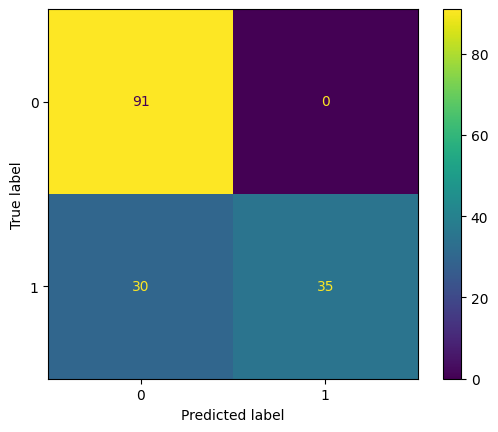

In [58]:
from sklearn.metrics import confusion_matrix,roc_curve,ConfusionMatrixDisplay

k = action_recognition_model.predict(features_test,batch_size=3)
y_pred = np.argmax(k,axis=1)
y_true = np.argmax(labels_test,axis=1)

ConfusionMatrixDisplay(confusion_matrix(y_true,y_pred)).plot()

In [60]:
# Save the model in HDF5 format
action_recognition_model.save('/path/to/save/modelll.h5', save_format='h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Path to your saved model file
model_path = '/path/to/save/modelll.h5'

# Upload the model file to Google Drive
file_name = 'modelll.h5'  # Name for the uploaded file
file = drive.CreateFile({'title': file_name})
file.SetContentFile(model_path)
file.Upload()

# Get the link to the uploaded file
print('Uploaded file with ID {}'.format(file.get('id')))


Uploaded file with ID 16ltqx1BQ_s_ASDDDYa8JzwuWCEupiwWc


In [ ]:
action_recognition_model.save()

In [37]:
def predict_single_action(video_file_path, SEQUENCE_LENGTH):
    '''
    This function will perform single action recognition prediction on a video using the LRCN model.
    Args:
    video_file_path:  The path of the video stored in the disk on which the action recognition is to be performed.
    SEQUENCE_LENGTH:  The fixed number of frames of a video that can be passed to the model as one sequence.
    '''

    # Initialize the VideoCapture object to read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)

    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Declare a list to store video frames we will extract.
    frames_list = []

    # Initialize a variable to store the predicted action being performed in the video.
    predicted_class_name = ''

    # Get the number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)

    # Iterating the number of times equal to the fixed length of sequence.
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Read a frame.
        success, frame = video_reader.read()

        # Check if frame is not read properly then break the loop.
        if not success:
            break

        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
        normalized_frame = resized_frame / 255

        # Appending the pre-processed frame into the frames list
        frames_list.append(normalized_frame)

    # Passing the  pre-processed frames to the model and get the predicted probabilities.
    predicted_labels_probabilities = action_recognition_model.predict(np.expand_dims(frames_list, axis = 0))[0]

    # Get the index of class with highest probability.
    predicted_label = np.argmax(predicted_labels_probabilities)

    # Get the class name using the retrieved index.
    predicted_class_name = CLASSES_LIST[predicted_label]

    # Display the predicted action along with the prediction confidence.
    print(f'Action Predicted: {predicted_class_name}\nConfidence: {predicted_labels_probabilities[predicted_label]}')

    # Release the VideoCapture object.
    video_reader.release()

In [ ]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

In [ ]:
from IPython.display import Video
input_video_file_path = "/content/drive/MyDrive/WhatsApp Video 2024-03-01 at 9.59.53 PM (3).mp4"
predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

# Display the input video.
show_video(input_video_file_path)